<a href="https://colab.research.google.com/github/dcamcan1/MLA_DCC/blob/main/MLA4_DCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 4
## Danny Cannon
## CS-430-ON
## Machine Learning in the Cloud

## 1. Imports for specific models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Include imports for tree
from sklearn import tree
from sklearn.tree import export_text

In [3]:
# Imports for Splitting Data and Building Pipeline
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn import set_config
set_config(display='diagram')

In [5]:
# Imports for Peformance Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

In [6]:
# Confusion Matrix Function
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [7]:
# Straight line on a plot
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

## 2. SVC Classification - Acquire Data

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
# Load the banknote_authentication.csv into a data frame named df.
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 3. Statistics and Visual Exploration
You do not need this section for this notebook - you did this in last module's assignment.

## 4. Splitting Data into Train/Test

In [12]:
# Create a data frame called X of your inputs that includes all columns except date and forgery.
X = df.drop(columns=['forgery'])
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
# Create a data frame called y of your output that includes only forgery. This will be your target variable that you are trying to predict.
y = df['forgery']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: forgery, dtype: int64

In [14]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Building the Pipeline

In [15]:
# Create a column transformer that will MinMax scale the numerical variables.
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

col_transform = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs)
])

In [16]:
# Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.
pipeline = Pipeline([
  ('transform', col_transform),
  ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
])

## 6. Executing the Model

In [17]:
# Run the pipeline to fit the DecisionTreeClassification model.
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

## 7. Evaluating the Model

In [18]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

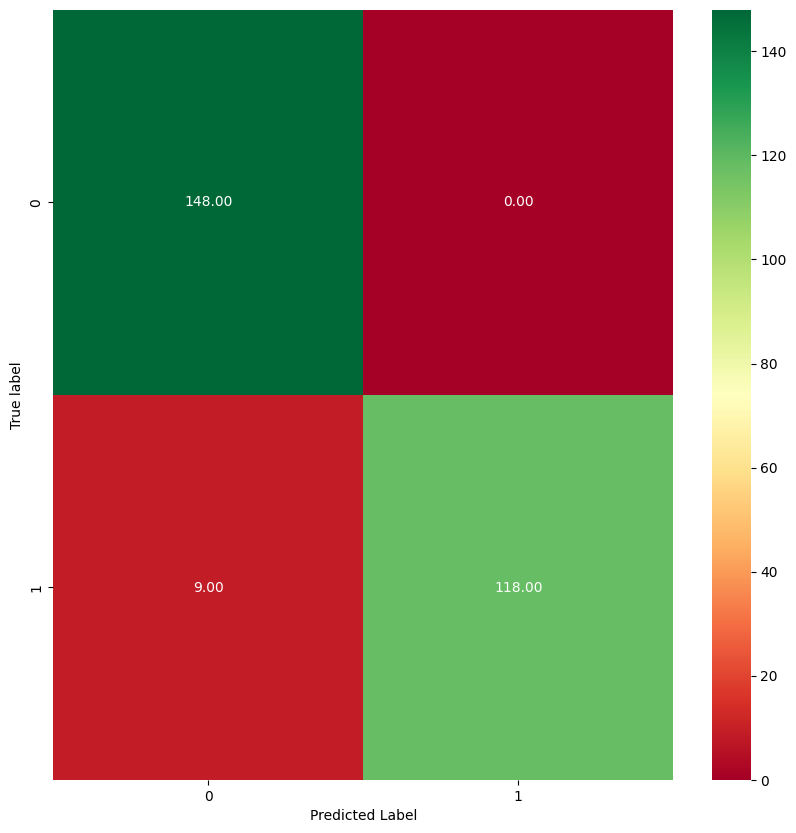

In [19]:
# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)

In [20]:
# Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Precision: 1.0
Recall: 0.9291338582677166
F1 Score: 0.963265306122449


Based on the precision, recall, and f1_score, the model shows strong performance in identifying whether the banknotes are forgeries.

[Text(0.5333333333333333, 0.9166666666666666, 'x[0] <= 0.531\nsamples = 1097\nvalue = [614, 483]'),
 Text(0.35833333333333334, 0.75, 'x[1] <= 0.806\nsamples = 528\nvalue = [97, 431]'),
 Text(0.25, 0.5833333333333334, 'x[0] <= 0.475\nsamples = 450\nvalue = [32, 418]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[2] <= 0.495\nsamples = 380\nvalue = [12, 368]'),
 Text(0.06666666666666667, 0.25, 'x[1] <= 0.786\nsamples = 259\nvalue = [1, 258]'),
 Text(0.03333333333333333, 0.08333333333333333, 'samples = 254\nvalue = [0, 254]'),
 Text(0.1, 0.08333333333333333, 'samples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 0.34\nsamples = 121\nvalue = [11, 110]'),
 Text(0.16666666666666666, 0.08333333333333333, 'samples = 109\nvalue = [0, 109]'),
 Text(0.23333333333333334, 0.08333333333333333, 'samples = 12\nvalue = [11, 1]'),
 Text(0.36666666666666664, 0.4166666666666667, 'x[2] <= 0.34\nsamples = 70\nvalue = [20, 50]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 0.719\nsamples = 59\nvalue = 

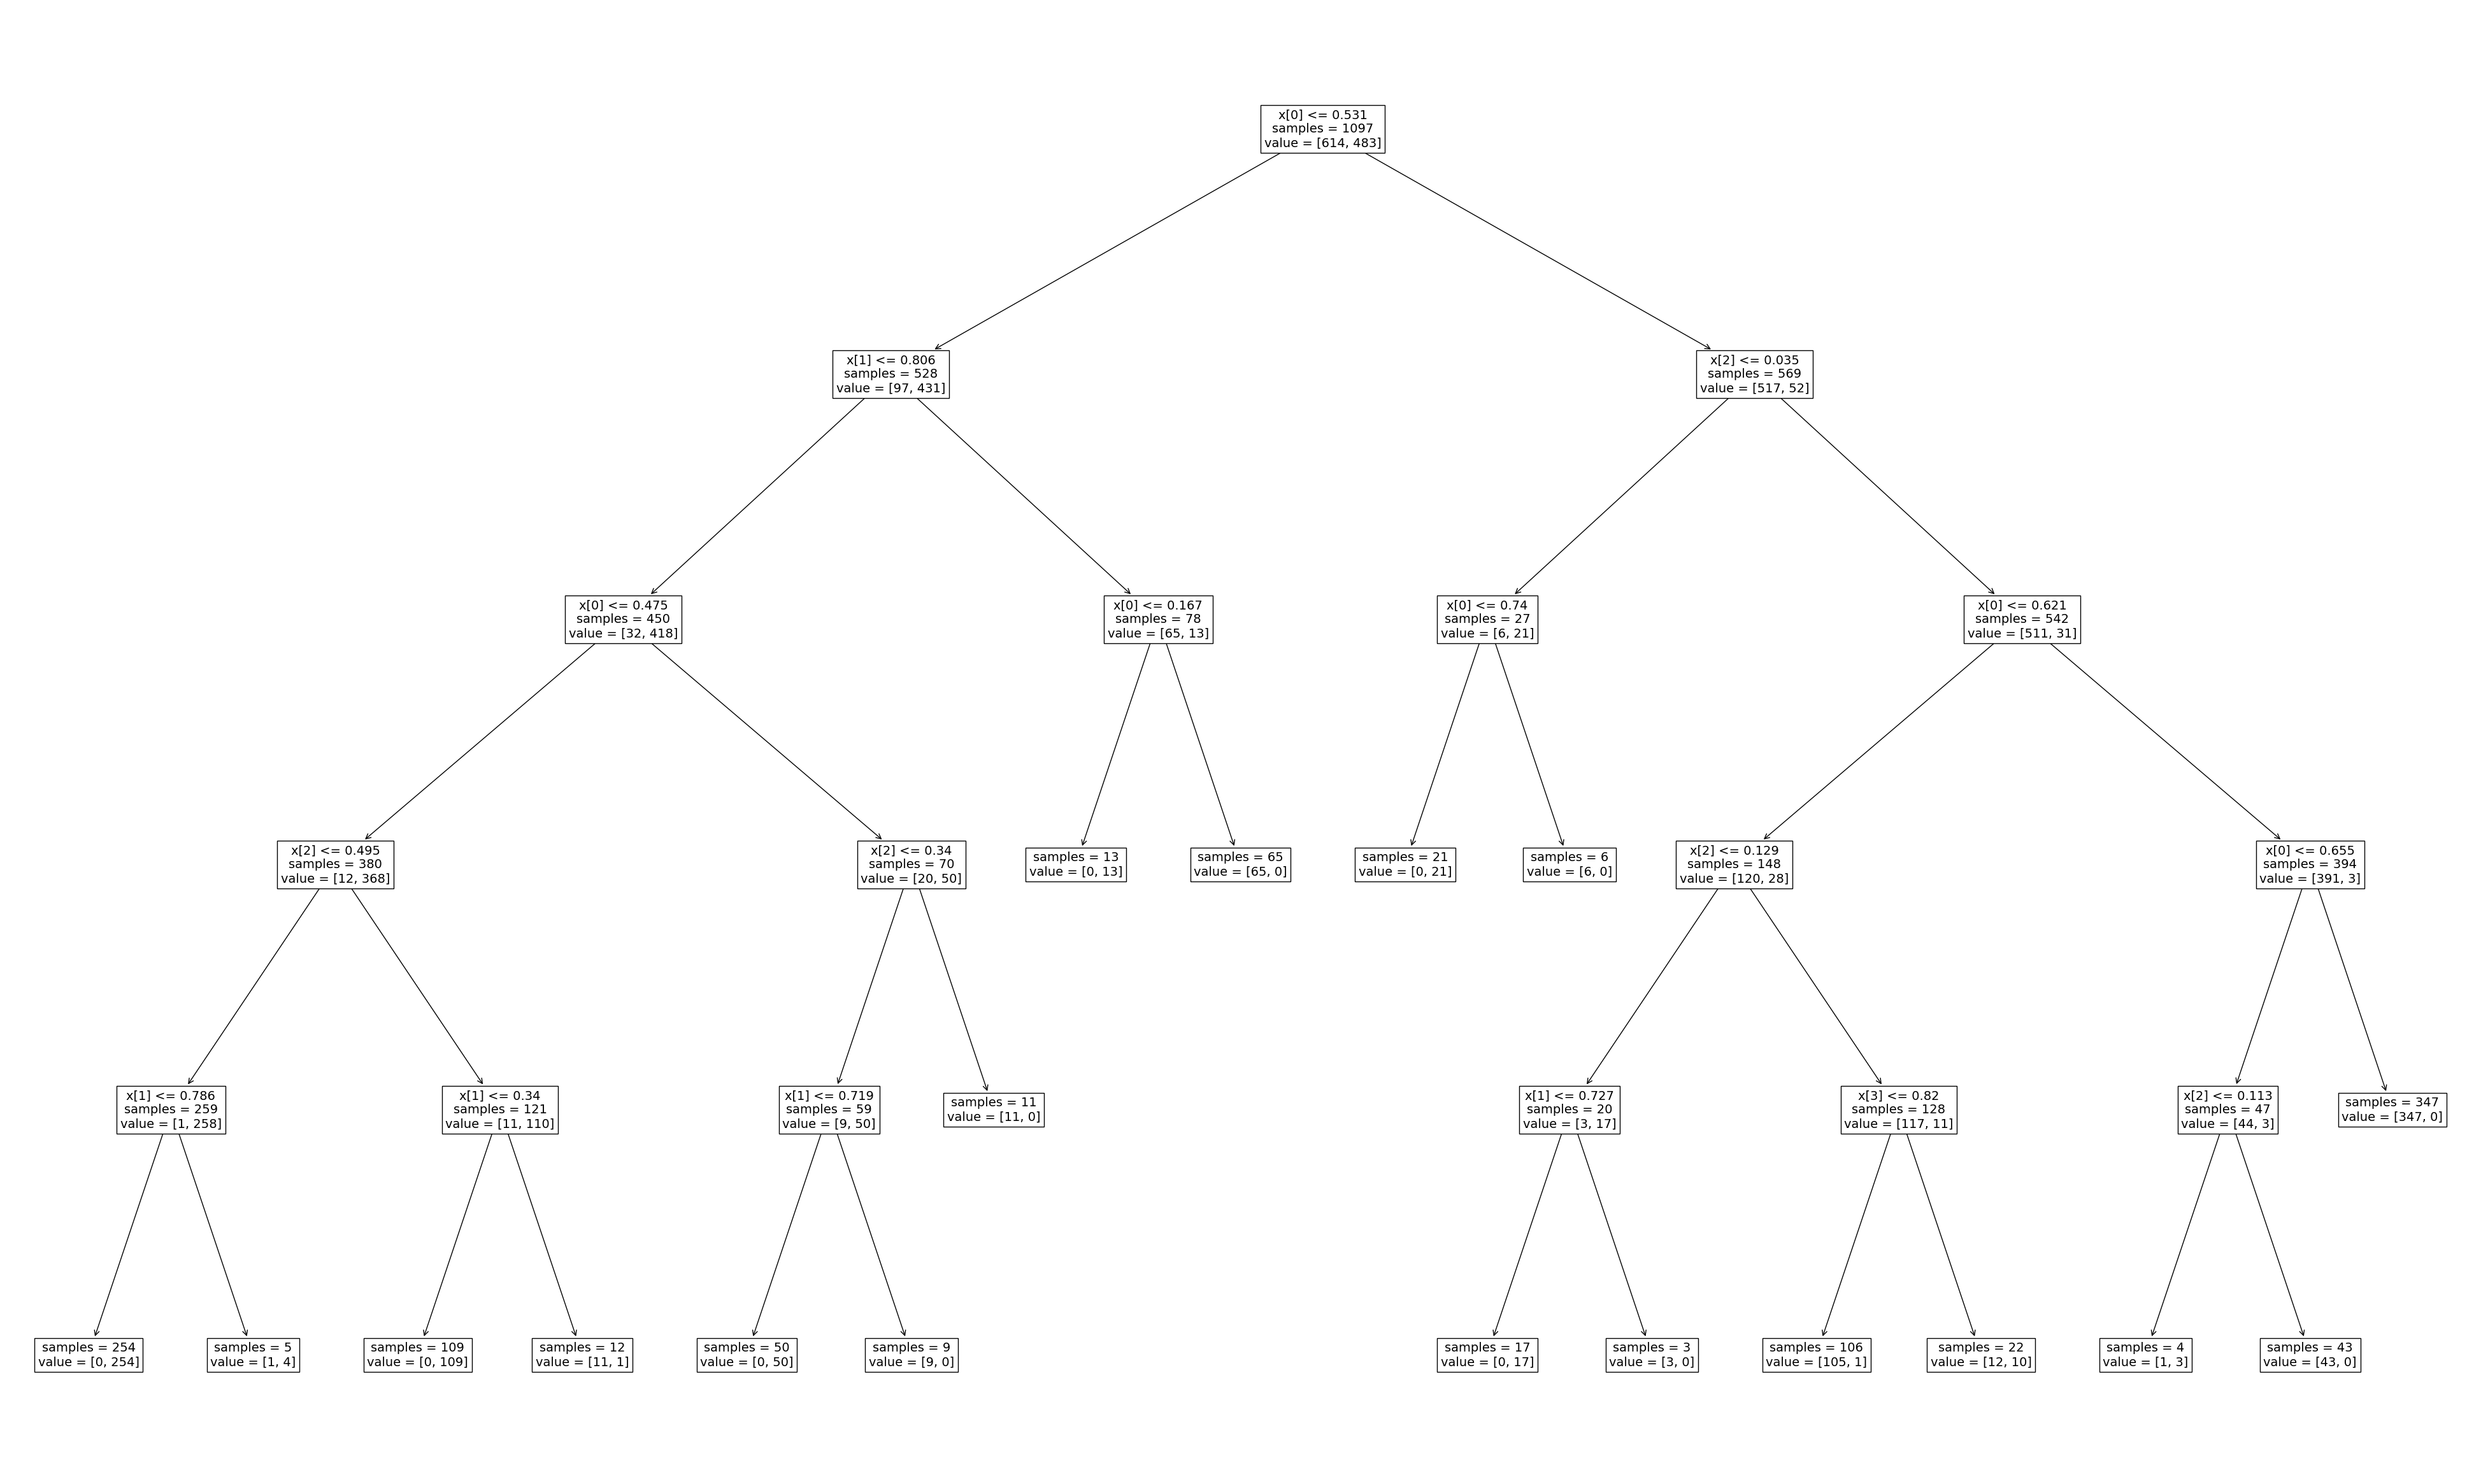

In [21]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14, impurity=False)

## 8. Conclusion

In a markdown comment, write a conclusion on how suitable you think this model is for predicting whether or not a banknote is a forgery

This model is certainly suitable for predicting whether or not a banknote is a forgery.

Now you are going to do an DecisionTree Regression to predict whether the usage in KWH for the steel industry data. You should already have a copy of this data because you used it in a previous model. If you do not, I have attached a copy to this assignment.

## 1. Acquire Data

In [24]:
# Load the Steel_industry_data.csv into a data frame named df.
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [25]:
# Rename the columns according to Table 1: Columns Names.
df = df.rename(columns={
  "Usage_kWh":"usage_kwh",
  "Lagging_Current_Reactive.Power_kVarh":"lag_react_pwr_kvarh",
  "Leading_Current_Reactive_Power_kVarh":"lead_react_pwr_kvarh",
  "Lagging_Current_Power_Factor":"lag_current_pwr",
  "Leading_Current_Power_Factor":"lead_current_pwr",
  "NSM":"nsm",
  "WeekStatus":"week_status",
  "Day_of_week":"day_of_week",
  "Load_Type":"load_type"
  })
df.head(5)


,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## 2. Splitting Data into Train/Test

In [26]:
# Create a data frame called X of your inputs that includes all columns except date and usage_kwh.
X = df.drop(columns=['date', 'usage_kwh'])

In [27]:
# Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.
y = df['usage_kwh']

In [28]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Building the Pipeline

In [29]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

col_transformer = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attribs)],
  remainder='passthrough'
)

In [30]:
# Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.
pipeline = Pipeline([
  ('transform', col_transformer),
  ('decision_tree', tree.DecisionTreeRegressor(max_depth=5))
])

## 4. Executing the Model

In [31]:
# Run the pipeline to fit the DecisionTreeRegression.
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

## 5. Evaluating the Model

In [32]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)
y_pred

array([  3.46005644,  63.89876543, 127.64993884, ..., 145.76789474,
         3.46005644,  39.80809917])

In [33]:
# Calculate the root mean squared error for both train and test. In a Markdown comment below your results, interpret your results.
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

3.5222047112511516
3.523585159694944


Based on the results, the predictions are quite accurate.

## 6. Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.

The model is very suitable for predicting kwh usage.